In [230]:
import pandas as pd
from IPython.display import display
from datetime import datetime
from z3 import *

def preprocess(cars_df):
    current_year = datetime.now().year
    cars_df['Age_of_Car'] = current_year - cars_df['Year']
    cars_df.drop(columns=['Year'], inplace=True)
    cars_df['Mileage'] = cars_df['Mileage'].str.replace(r'[^\d.]+', '', regex=True).astype(float)
    cars_df['Engine'] = cars_df['Engine'].str.replace(r'[^\d.]+', '', regex=True).astype(float)
    cars_df['Power'] = cars_df['Power'].str.replace(r'[^\d.]+', '', regex=True).astype(float)
    cars_df['Transmission'] = cars_df['Transmission'].map({'Manual': 0, 'Automatic': 1})
    cars_df['Fuel_Type'] = cars_df['Fuel_Type'].map({'Petrol': 0, 'Diesel': 1})
    cars_df['Owner_Type'] = cars_df['Owner_Type'].map({'First': 1, 'Second': 2, 'Third': 3, 'Fourth': 4})
    
    # cars_df['Price_per_km'] = cars_df['Kilometers_Driven'] / cars_df['Engine']
    # cars_df['Age_Mileage'] = cars_df['Age_of_Car'] * cars_df['Kilometers_Driven']
    

    cars_df.dropna(inplace=True)

    return cars_df
    # cars_df['Mileage'].fillna(cars_df['Mileage'].median(), inplace=True)  # Replace NaN in 'Year' with median
    # cars_df['Owner_Type'].fillna(cars_df['Owner_Type'].mode()[0], inplace=True)  # Replace NaN in 'Owner_Type' with mode
    # cars_df['Engine'].fillna(cars_df['Engine'].mean(), inplace=True)

    # cars_df = pd.get_dummies(cars_df, columns=['Location'], drop_first=True)

# Load the datasets
cars_df = pd.read_csv('used_cars_india.csv')
pd.set_option('display.max_columns', None)
# Pretty print the head of the dataframe
cars_df = cars_df.drop(cars_df.columns[0], axis=1)
columns_to_drop = ['New_Price', 'Location']
cars_df = cars_df.drop(columns=columns_to_drop)


cars_df = preprocess(cars_df)
display(cars_df.head())
print(f"DataFrame length: {len(cars_df)}")


,Name,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_Car
0,Hyundai Creta 1.6 CRDi SX Option,41000,1.0,0,1.0,19.67,1582.0,126.20,5.0,12.50,9
1,Honda Jazz V,46000,0.0,0,1.0,13.00,1199.0,88.70,5.0,4.50,13
2,Maruti Ertiga VDI,87000,1.0,0,1.0,20.77,1248.0,88.76,7.0,6.00,12
3,Audi A4 New 2.0 TDI Multitronic,40670,1.0,1,2.0,15.20,1968.0,140.80,5.0,17.74,11
4,Nissan Micra Diesel XV,86999,1.0,0,1.0,23.08,1461.0,63.10,5.0,3.50,11


DataFrame length: 5800


In [231]:
max_price = cars_df['Price'].max()
min_price = cars_df['Price'].min()

print(f"Maximum Price: {max_price}")
print(f"Minimum Price: {min_price}")

Maximum Price: 160.0
Minimum Price: 0.44


In [232]:
lowest_priced_cars = cars_df.nsmallest(5, 'Price')
display(lowest_priced_cars)

,Name,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_Car
1660,Tata Nano Lx,65000,0.0,0,2.0,26.0,624.0,35.0,4.0,0.44,13
1577,Maruti 800 Std BSIII,12000,0.0,0,2.0,16.1,796.0,37.0,4.0,0.45,20
2758,Hyundai Getz GLS,86000,0.0,0,2.0,15.3,1341.0,83.0,5.0,0.45,19
3039,Maruti Zen LXI,95150,0.0,0,3.0,17.3,993.0,60.0,5.0,0.45,26
2520,Tata Nano Cx,57000,0.0,0,1.0,26.0,624.0,35.0,4.0,0.50,14


4.8875


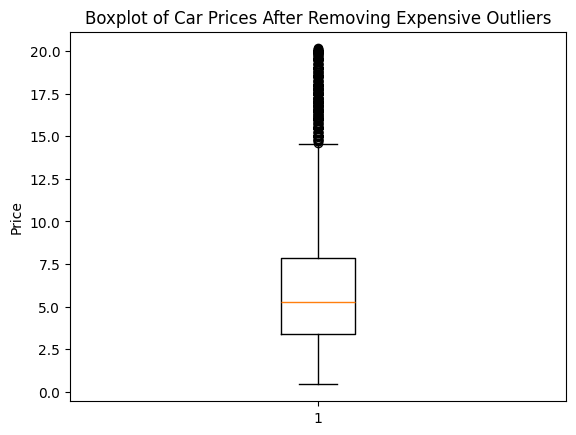

In [233]:

import matplotlib.pyplot as plt

Q1 = cars_df['Price'].quantile(0.25)
Q3 = cars_df['Price'].quantile(0.75)
IQR = Q3 - Q1

# Define upper bound
upper_bound = Q3 + 1.5 * IQR
# print(f"Upper Bound for Price: {upper_bound}")

min_reasonable_price = cars_df['Price'].quantile(0.5) * 0.85
print(min_reasonable_price)
# Filter out expensive outliers
cars_df = cars_df[cars_df['Price'] <= upper_bound]

# Display the filtered DataFrame
# print("Filtered DataFrame (After Removing Expensive Outliers):")
# print(filtered_cars_df)

# Plot a boxplot for the filtered dataset
plt.boxplot(cars_df['Price'])
plt.title('Boxplot of Car Prices After Removing Expensive Outliers')
plt.ylabel('Price')
plt.show()

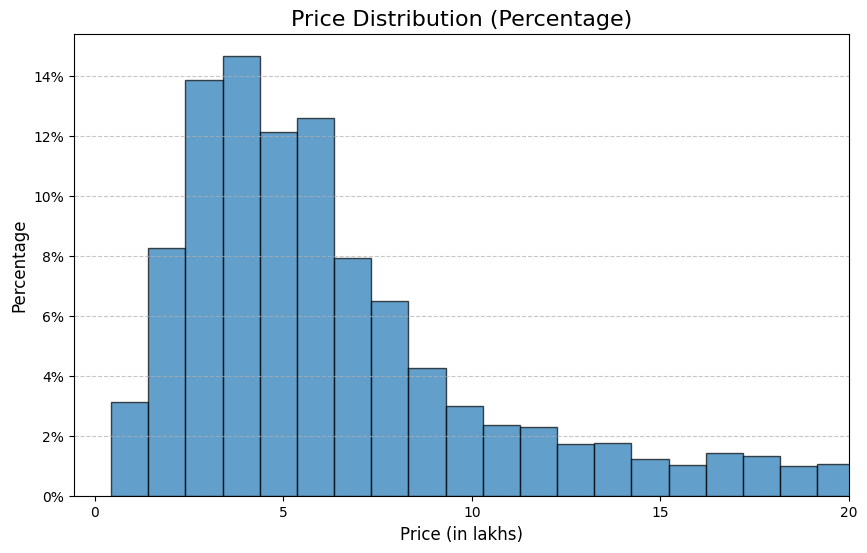

In [234]:
import pandas as pd
import matplotlib.pyplot as plt

# Plot the price distribution
plt.figure(figsize=(10, 6))
plt.hist(cars_df['Price'], bins=20, edgecolor='black', alpha=0.7, density=True)

# Convert density to percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: f'{int(y * 100)}%'))

# Set x-axis ticks in intervals of 10
plt.xticks(range(0, int(cars_df['Price'].max()) + 10, 5))

# Add titles and labels
plt.xlim(right=20)
plt.title('Price Distribution (Percentage)', fontsize=16)
plt.xlabel('Price (in lakhs)', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [235]:
display(cars_df.head())

,Name,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_Car
0,Hyundai Creta 1.6 CRDi SX Option,41000,1.0,0,1.0,19.67,1582.0,126.20,5.0,12.50,9
1,Honda Jazz V,46000,0.0,0,1.0,13.00,1199.0,88.70,5.0,4.50,13
2,Maruti Ertiga VDI,87000,1.0,0,1.0,20.77,1248.0,88.76,7.0,6.00,12
3,Audi A4 New 2.0 TDI Multitronic,40670,1.0,1,2.0,15.20,1968.0,140.80,5.0,17.74,11
4,Nissan Micra Diesel XV,86999,1.0,0,1.0,23.08,1461.0,63.10,5.0,3.50,11


In [236]:
from sklearn.preprocessing import StandardScaler

def custom_transform(cars_df, fit = False):
    # Column to drop
    columndrop = 'Name'

    # Drop the column only if it exists
    if columndrop in cars_df.columns:
        cars_df = cars_df.drop(columns=[columndrop])
    columns_to_scale = ['Age_of_Car', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']

    if fit:
        cars_df[columns_to_scale] = scaler.fit_transform(cars_df[columns_to_scale])
    else:
        cars_df[columns_to_scale] = scaler.transform(cars_df[columns_to_scale])        

    return cars_df

scaler = StandardScaler()
cols = [col for col in cars_df.columns if col != 'Price'] + ['Price']
cars_scaled_df = custom_transform(cars_df, fit = True)

print("DataFrame after Standard Scaling:")
display(cars_scaled_df.head())


DataFrame after Standard Scaling:


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Age_of_Car
0,-0.467979,1.0,0,1.0,0.246085,0.124747,0.641185,-0.370089,1.503886,-0.544235
1,-0.339196,0.0,0,1.0,-1.365000,-0.642427,-0.327689,-0.370089,-0.433958,0.702270
2,0.716820,1.0,0,1.0,0.511782,-0.544277,-0.326139,2.190028,-0.070612,0.390644
3,-0.476478,1.0,1,2.0,-0.833607,0.897930,1.018401,-0.370089,2.773174,0.079018
4,0.716794,1.0,0,1.0,1.069744,-0.117624,-0.989107,-0.370089,-0.676189,0.079018


In [237]:
def reverse_transform(cars_df):
    # Define the columns to reverse scale
    columns_to_scale = ['Age_of_Car', 'Kilometers_Driven', 'Mileage', 'Engine', 'Power', 'Seats', 'Price']
    # Reverse the scaling
    cars_df[columns_to_scale] = scaler.inverse_transform(cars_df[columns_to_scale])
    # display(cars_df)
    return cars_df

In [238]:
print(cars_scaled_df.shape)

(5119, 10)


In [239]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

# Split the data into features and target
X_cars = cars_scaled_df.drop('Price', axis=1)  # Features
y_cars = cars_scaled_df['Price']  # Target variable (Price)

# Split the dataset into training and testing sets
X_train_cars, X_test_cars, y_train_cars, y_test_cars = train_test_split(X_cars, y_cars, test_size=0.3, random_state=0)


In [240]:
# Initialize the model
linear_reg_model = LinearRegression()

# Train the model
linear_reg_model.fit(X_train_cars, y_train_cars)

# Make predictions on the test set
y_pred_cars = linear_reg_model.predict(X_test_cars)

# Calculate performance metrics
rmse = mean_squared_error(y_test_cars, y_pred_cars, squared=False)
r2 = r2_score(y_test_cars, y_pred_cars)

# Print out the RMSE and R-squared values
print(f"Model - RMSE: {rmse}")
print(f"Model - R² Score: {r2}")

Model - RMSE: 0.5217326746764525
Model - R² Score: 0.7329929067257535


/opt/anaconda3/envs/condaEnv311/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [241]:
# # Initialize and train the Random Forest Regressor
# rf = RandomForestRegressor(random_state=0, n_estimators=100)
# rf.fit(X_train_cars, y_train_cars)

# # Make predictions
# y_pred_cars = rf.predict(X_test_cars)

# # Evaluate the model
# rmse = mean_squared_error(y_test_cars, y_pred_cars, squared=False)
# r2 = r2_score(y_test_cars, y_pred_cars)

# print(f"Model - RMSE: {rmse}")
# print(f"Model - R² Score: {r2}")

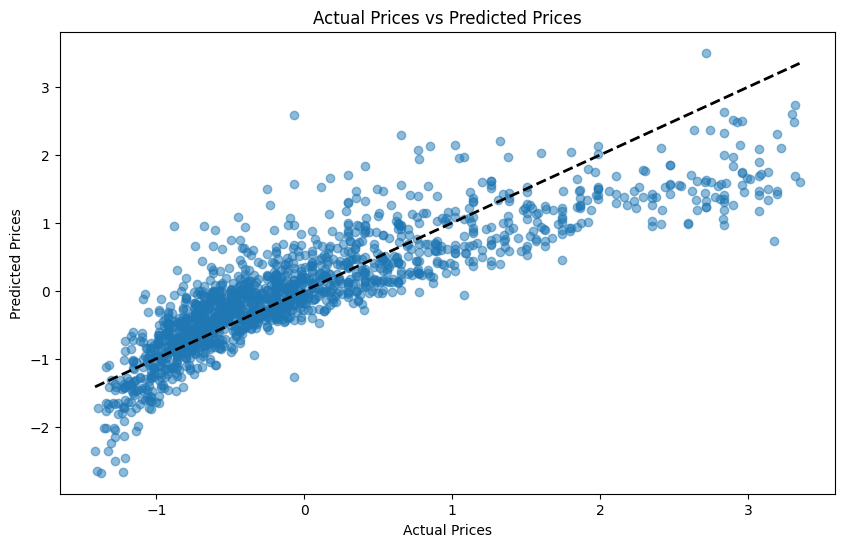

In [242]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cars, y_pred_cars, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([y_test_cars.min(), y_test_cars.max()], [y_test_cars.min(), y_test_cars.max()], 'k--', lw=2)
plt.show()

In [243]:
# data = {
#     'Name': [
#         'Hyundai Creta 1.6 CRDi SX', 'Honda City i-DTEC VX', 
#         'Maruti Suzuki Swift VDI', 'Toyota Innova Crysta 2.4 GX',
#         'Ford EcoSport Titanium 1.5'
#     ],
#     'Kilometers_Driven': [41000, 60000, 35000, 72000, 45000],
#     'Fuel_Type': ['Diesel', 'Diesel', 'Diesel', 'Diesel', 'Petrol'],
#     'Transmission': ['Manual', 'Manual', 'Manual', 'Manual', 'Automatic'],
#     'Owner_Type': ['First', 'First', 'Second', 'First', 'First'],
#     'Mileage': ['19.67 mpg', '23.67 mpg', '22.7 mpg', '15.1 mpg', '17.0 mpg'],
#     'Engine': ['1582 hp', '1498 cc', '1248 cc', '2393 cc', '1496 cc'],
#     'Power': ['126.2 hp', '100.0 hp', '74.0 hp', '148.0 hp', '123.0 hp'],
#     'Seats': [5, 5, 5, 7, 5],
#     'Year': [2015, 2012, 2017, 2015, 2020],
#     'Price': 0
# }

# # Convert to DataFrame
# sample_df = pd.DataFrame(data)

# # Display the sample DataFrame
# df = preprocess(sample_df)
# print("before")
# display(df.head())
# df = custom_transform(df)
# print("after")
# df = df.drop(columns=['Price'])

In [244]:
# sample_y_pred_cars = linear_reg_model.predict(df)
# df['Price'] = sample_y_pred_cars
# display(df)


In [245]:
# cars_df_untransform = reverse_transform(df)
# display(cars_df_untransform)

In [246]:
# base_point = {
#   "Name": 'Honda City 1.5 V AT Sunroo',
#   "Kilometers_Driven": 60000,
#   "Fuel_Type": "Petrol",
#   "Transmission": "Automatic",
#   "Owner_Type": "First",
#   "Mileage": "16.8 kmpl",
#   "Engine": "1497 CC",
#   "Power": "116.3 bhp",
#   "Seats": 5,  
#   "Price": 4.49,
#   "Year": 2012
# }
# tsample_df = pd.DataFrame([base_point])
# df = preprocess(tsample_df.copy())
# df = custom_transform(df)
# display(df)


In [247]:
# max_price_row_df = cars_scaled_df.loc[[cars_df['Price'].idxmax()]]
# min_price_row_df = cars_scaled_df.loc[[cars_df['Price'].idxmin()]]

# display(max_price_row_df)
# display(min_price_row_df)

# min_price = reverse_transform(min_price_row_df)
# max_price = reverse_transform(max_price_row_df)

# display(max_price_row_df)
# display(min_price_row_df)


In [248]:
# Define the features and coefficients
features = [
    "Kilometers_Driven", "Fuel_Type", "Transmission", "Owner_Type",
    "Mileage", "Engine", "Power", "Seats", "Age_of_Car"
]

print(X_train_cars.columns)

coefficients = linear_reg_model.coef_
intercept = linear_reg_model.intercept_
# importances = rf.feature_importances_
# feature_imp_df = pd.DataFrame({'Feature': features, 'Gini Importance': importances}).sort_values('Gini Importance', ascending=True) 
# print(feature_imp_df)

# Create a bar plot for feature importance
# plt.figure(figsize=(8, 4))
# plt.barh(feature_names, importances, color='skyblue')
# plt.xlabel('Gini Importance')
# plt.title('Feature Importance - Gini Importance')
# plt.gca().invert_yaxis()  # Invert y-axis for better visualization
# plt.show()

# Combine features and coefficients into a dictionary
feature_coeff_dict = dict(zip(features, coefficients))

# Sort the features by the absolute value of their coefficients
sorted_features = sorted(feature_coeff_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted feature-importance pairs
sum = 0
print("Feature Coefficients:")
for feature, coef in sorted_features:
    print(f"{feature}: {coef:.4f}")
    sum = sum + coef
    
print(sum)


Index(['Kilometers_Driven', 'Fuel_Type', 'Transmission', 'Owner_Type',
       'Mileage', 'Engine', 'Power', 'Seats', 'Age_of_Car'],
      dtype='object')
Feature Coefficients:
Fuel_Type: 0.4702
Transmission: 0.4489
Age_of_Car: -0.4445
Power: 0.4133
Mileage: -0.1645
Engine: 0.1074
Owner_Type: -0.0483
Kilometers_Driven: -0.0460
Seats: 0.0108
0.7473592425446357


In [249]:
# Define the absolute value function
def z3_abs(x):
    return If(x >= 0, x, -x)

In [250]:
existing_solutions = pd.DataFrame(columns=cols)
existing_solutions = existing_solutions.drop(columns=['Name'])
iterations = 1
max_iterations = 100
# max_iterations = 20

In [251]:
def z3_to_solution(km_driven, fuel_type, transmission, owner_type, mileage, engine, power, seats, age):
    # Assuming coefficients and intercept for prediction are defined
    pr = (
        coefficients[0] * km_driven +
        coefficients[1] * fuel_type +
        coefficients[2] * transmission +
        coefficients[3] * owner_type +
        coefficients[4] * mileage +
        coefficients[5] * engine +
        coefficients[6] * power +
        coefficients[7] * seats +
        coefficients[8] * age +
        intercept
    )

    # Create a DataFrame with the input and the predicted price
    solution_df = pd.DataFrame([{
        'Kilometers_Driven': km_driven,
        'Fuel_Type': fuel_type,
        'Transmission': transmission,
        'Owner_Type': owner_type,
        'Mileage': mileage,
        'Engine': engine,
        'Power': power,
        'Seats': seats,
        'Age_of_Car': age,
        'Price': pr
    }])
    # Apply any custom untransform logic if necessary
    untransformed_solution = reverse_transform(solution_df)
    untransformed_solution_df = pd.DataFrame(untransformed_solution)

    return pr, untransformed_solution_df


In [252]:
from z3 import *

# Initialize the Z3 solver
solver = Solver()
solver.set("timeout", 1000)

# Define Z3 variables
km_driven_z3 = Real('Kilometers_Driven')
fuel_type_z3 = Real('Fuel_Type')  # 0 for Diesel, 1 for Petrol
transmission_z3 = Real('Transmission')  # 0 for Manual, 1 for Automatic
owner_type_z3 = Real('Owner_Type')  # 1 for First Owner, 2 for Second Owner
mileage_z3 = Real('Mileage')
engine_z3 = Real('Engine')
power_z3 = Real('Power')
seats_z3 = Real('Seats')
age_of_car_z3 = Real('Age_of_Car')  # Instead of Year, we use Age_of_Car

# Model coefficients and intercept
coefficients = linear_reg_model.coef_

intercept = linear_reg_model.intercept_

print(existing_solutions)

# Prediction equation based on the linear regression model
prediction = (
    coefficients[0] * km_driven_z3 +
    coefficients[1] * fuel_type_z3 +
    coefficients[2] * transmission_z3 +
    coefficients[3] * owner_type_z3 +
    coefficients[4] * mileage_z3 +
    coefficients[5] * engine_z3 +
    coefficients[6] * power_z3 +
    coefficients[7] * seats_z3 +
    coefficients[8] * age_of_car_z3 +  # Using Age_of_Car as Year proxy
    intercept
)

# print(prediction)


Empty DataFrame
Columns: [Kilometers_Driven, Fuel_Type, Transmission, Owner_Type, Mileage, Engine, Power, Seats, Age_of_Car, Price]
Index: []


In [253]:
def append_as_unique_ints(df, tdf):
    tdf = tdf.astype(int)
    row = tdf.iloc[0]
    
    # exclude the price column from the comparison
    columns_to_compare = df.columns[:-1]
    
    # if the row (excluding the price column) is unique in the DataFrame
    if not ((df[columns_to_compare] == row[columns_to_compare]).all(axis=1)).any():
        df = pd.concat([df, pd.DataFrame([row])], ignore_index=True)
        # df.to_csv('solutions.csv', index=False)
    
    return df

In [254]:
# cars_df['Price_per_km'] = cars_df['Kilometers_Driven'] / cars_df['Engine']
# cars_df['Age_Mileage'] = cars_df['Age_of_Car'] * cars_df['Mileage']

# delta = {
#     'Kilometers_Driven': 1000,       # Significant difference in kilometers driven
#     'Fuel_Type': 1,               # Small difference, or use strict equality
#     'Transmission': 1,              # Strict equality for binary variables
#     'Owner_Type': 1,                # At least one ownership difference
#     'Mileage': 2.0,                 # Noticeable difference in mileage (kmpl)
#     'Engine': 100,                  # Significant difference in engine size (cc)
#     'Power': 10,                    # Difference in power (bhp)
#     'Seats': 0,                     # Strict equality for seat count
#     'Age_of_Car': 1,                # Difference in years of age
#     'Age_Mileage': 10000,             # Difference in derived feature
#     'Price': 0.5          # Difference in predicted price (lakhs)
# }

delta = {
    'Kilometers_Driven': 0.1,       # Significant difference in kilometers driven
    'Fuel_Type': 0.1,               # Small difference, or use strict equality
    'Transmission': 0.1,              # Strict equality for binary variables
    'Owner_Type': 0.1,                # At least one ownership difference
    'Mileage': 0.1,                 # Noticeable difference in mileage (kmpl)
    'Engine': 0.1,                  # Significant difference in engine size (cc)
    'Power': 0.1,                    # Difference in power (bhp)
    'Seats': 0.1,                     # Strict equality for seat count
    'Age_of_Car': 0.1,                # Difference in years of age
    'Price': 0.1         # Difference in predicted price (lakhs)
}


lower_bound = {
    'Kilometers_Driven': 10000,       # Significant difference in kilometers driven
    'Fuel_Type': 0,               # Small difference, or use strict equality
    'Transmission': 0,              # Strict equality for binary variables
    'Owner_Type': 1,                # At least one ownership difference
    'Mileage': 10.0,                 # Noticeable difference in mileage (kmpl)
    'Engine': 700,                  # Significant difference in engine size (cc)
    'Power': 50,                    # Difference in power (bhp)
    'Seats': 4,                     # Strict equality for seat count
    'Age_of_Car': 3,                # Difference in years of age
    'Price': 1.0,          # Difference in predicted price (lakhs)
}

upper_bound = {
    'Kilometers_Driven': 150000,       # Significant difference in kilometers driven
    'Fuel_Type': 1,               # Small difference, or use strict equality
    'Transmission': 1,              # Strict equality for binary variables
    'Owner_Type': 4,                # At least one ownership difference
    'Mileage': 40.0,                 # Noticeable difference in mileage (kmpl)
    'Engine': 3000,                  # Significant difference in engine size (cc)
    'Power': 300,                    # Difference in power (bhp)
    'Seats': 7,                     # Strict equality for seat count
    'Age_of_Car': 10,                # Difference in years of age
    'Price': 15.0,          # Difference in predicted price (lakhs)
}

upper_bound = custom_transform(pd.DataFrame([upper_bound])).iloc[0]
lower_bound = custom_transform(pd.DataFrame([lower_bound])).iloc[0]
# delta = custom_transform(pd.DataFrame([delta])).iloc[0]

# print(upper_bound)
# print(lower_bound)
# print(delta)

# solver.add(km_driven_z3 >= lower_bound['Kilometers_Driven'], km_driven_z3 <= upper_bound['Kilometers_Driven'])
# solver.add(mileage_z3 >= lower_bound['Mileage'], mileage_z3 <= upper_bound['Mileage'])
# solver.add(engine_z3 >= lower_bound['Engine'], engine_z3 <= upper_bound['Engine'])
# solver.add(power_z3 >= lower_bound['Power'], power_z3 <= upper_bound['Power'])
# solver.add(age_of_car_z3 >= lower_bound['Age_of_Car'], age_of_car_z3 <= upper_bound['Age_of_Car'])  # Age constraint
# solver.add(age_mileage_z3 >= lower_bound['Age_of_Car'] * lower_bound['Kilometers_Driven'], age_mileage_z3 <= upper_bound['Age_of_Car'] * upper_bound['Kilometers_Driven'])
# solver.add(seats_z3 >= lower_bound['Seats'], seats_z3 <= upper_bound['Seats'])
# solver.add(Or(fuel_type_z3 == 0, fuel_type_z3 == 1))  # Fuel type: Diesel or Petrol
# solver.add(Or(transmission_z3 == 0, transmission_z3 == 1))  # Transmission: Manual or Automatic
# solver.add(Or(owner_type_z3 == 1, owner_type_z3 == 2, owner_type_z3 == 3, owner_type_z3 == 4))  # Owner type: 1 to 4
# solver.add(prediction <= lower_bound['Price'])  # Predicted price must be within a valid range


solver.add(km_driven_z3 >= lower_bound['Kilometers_Driven'], km_driven_z3 <= upper_bound['Kilometers_Driven'])
solver.add(mileage_z3 >= lower_bound['Mileage'], mileage_z3 <= upper_bound['Mileage'])
solver.add(engine_z3 >= lower_bound['Engine'],  engine_z3 <= upper_bound['Engine'])
solver.add(power_z3 >= lower_bound['Power'], power_z3 <= upper_bound['Power'])
solver.add(age_of_car_z3 >= lower_bound['Age_of_Car'], age_of_car_z3 <= upper_bound['Age_of_Car'])  # Age constraint
solver.add(seats_z3 >= lower_bound['Seats'], seats_z3 <= upper_bound['Seats'])
solver.add(Or(fuel_type_z3 == 0, fuel_type_z3 == 1))  # Fuel type: Diesel or Petrol
solver.add(Or(transmission_z3 == 0, transmission_z3 == 1))  # Transmission: Manual or Automatic
solver.add(Or(owner_type_z3 == 1, owner_type_z3 == 2, owner_type_z3 == 3, owner_type_z3 == 4))  # Owner type: 1 to 4
solver.add(prediction <= lower_bound['Price'])  # Predicted price must be within a valid range

while (solver.check() == sat) and (iterations <= max_iterations):
    # print(iterations)
    model = solver.model()
    km_val = float(model[km_driven_z3].as_decimal(10).rstrip('?'))
    fuel_val = float(model[fuel_type_z3].as_decimal(10).rstrip('?'))
    transmission_val = float(model[transmission_z3].as_decimal(10).rstrip('?'))
    owner_val = float(model[owner_type_z3].as_decimal(10).rstrip('?'))
    mileage_val = float(model[mileage_z3].as_decimal(10).rstrip('?'))
    engine_val = float(model[engine_z3].as_decimal(10).rstrip('?'))
    power_val = float(model[power_z3].as_decimal(10).rstrip('?'))
    seats_val = float(model[seats_z3].as_decimal(10).rstrip('?'))
    age_car_val = float(model[age_of_car_z3].as_decimal(10).rstrip('?'))
    pr_val, solution = z3_to_solution(km_val, fuel_val, transmission_val, owner_val, mileage_val, engine_val, power_val, seats_val, age_car_val)
    display(solution)
    existing_solutions = append_as_unique_ints(existing_solutions, solution)
    # existing_solutions = pd.concat([existing_solutions, solution], ignore_index=True)

    solver.add(Or(
        z3_abs(km_driven_z3 - km_val) > delta['Kilometers_Driven'],
        z3_abs(fuel_type_z3 - fuel_val) > delta['Fuel_Type'],
        z3_abs(transmission_z3 - transmission_val) > delta['Transmission'],
        z3_abs(owner_type_z3 - owner_val) > delta['Owner_Type'],
        z3_abs(mileage_z3 - mileage_val) > delta['Mileage'],
        z3_abs(engine_z3 - engine_val) > delta['Engine'],
        z3_abs(power_z3 - power_val) > delta['Power'],
        z3_abs(age_of_car_z3 - age_car_val) > delta['Age_of_Car'],
        z3_abs(prediction - pr_val) > delta['Price']
    ))

    if solver.check() != sat:
        break
    iterations += 1

# Output
print(f"Total iterations: {iterations}")
print("Solver state:", solver.check())



,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,59169.344208,0.0,0.0,4.0,36.939014,700.0,101.38311,4.0,10.0,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,1.0,0.0,2.0,37.660395,1249.158624,50.0,4.0,10.0,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,38.319939,700.0,107.549058,4.0,10.0,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,38.097728,762.064071,105.47165,4.0,10.0,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,40.0,1892.575652,89.765077,4.0,10.0,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,38.780299,1101.618768,101.167827,4.0,10.0,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,40.0,849.473233,94.391169,4.0,10.0,0.277192


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,39.333139,904.298521,96.917332,4.0,10.0,0.546636


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,38.29332,908.196241,81.95584,4.0,10.0,0.061041


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,38.29332,1906.666466,56.9375,4.0,9.622542,0.061041


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,39.981757,901.596618,89.765077,4.0,9.664963,0.314144


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,39.661926,940.163828,89.765077,4.0,9.039603,0.758483


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,39.861345,916.11662,94.931806,4.0,9.194173,0.8438


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,40.0,968.865546,93.854596,4.0,9.194173,0.820436


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,39.583773,966.30791,97.745826,4.0,9.299923,0.997498


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,39.99889,966.17402,97.735446,4.0,9.300784,0.92835


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,39.584328,966.107076,93.640737,5.97029,9.301214,0.927796


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,39.170302,1016.233682,93.636626,4.0,9.3012,0.927778


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,2.0,39.58473,1016.282195,93.639483,4.0,9.301318,0.859912


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,146113.53559,0.0,0.0,2.0,39.58473,1016.282195,93.639483,6.121317,9.300992,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,146113.53559,0.0,0.0,2.0,39.58473,1016.282195,97.51389,4.0,9.388282,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,145722.94173,0.0,0.0,2.0,39.128652,1021.304664,97.903272,4.0,9.56024,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,141672.439333,0.0,0.0,2.0,39.15281,1018.391485,97.677419,4.0,9.597259,0.982138


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,141797.442143,0.0,0.0,2.0,39.16614,1016.78413,93.764098,7.0,9.67555,0.931581


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,99046.784891,0.0,0.0,2.0,39.16614,1016.78413,93.678397,4.0,9.67555,0.965977


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,137886.270494,0.0,0.0,2.0,39.167668,1016.599894,93.692681,4.0,9.674366,0.776866


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,137864.778584,0.0,0.0,2.0,39.169959,1016.323539,93.678397,4.0,9.282176,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,133960.770907,0.0,0.0,2.0,39.16614,1016.78413,93.678397,6.902517,9.606625,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,130035.271319,0.0,0.0,2.0,39.16614,1016.78413,93.678397,4.0,9.606625,0.853796


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,95121.285304,0.0,0.0,2.0,39.16614,1016.78413,93.678397,4.0,9.649635,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,102972.284475,0.0,0.0,2.0,39.16614,1016.78413,93.678397,4.242358,9.606625,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,126109.771731,0.0,0.0,2.0,39.16614,1016.78413,93.678397,4.0,9.67555,0.833584


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,122184.272144,0.0,0.0,2.0,39.16614,1016.78413,93.678397,6.583236,9.67555,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,118258.772556,0.0,0.0,2.0,39.16614,1016.78413,93.678397,6.246257,9.67555,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,114146.285675,0.0,0.0,2.0,39.146201,1071.272091,93.864805,4.0,9.660095,0.960846


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,114292.579536,0.0,0.0,2.0,39.161801,1122.27157,93.718965,4.0,9.653894,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,110389.144457,0.0,0.0,2.0,39.168493,1021.079587,93.718965,5.244448,9.652165,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,109195.006576,0.0,0.0,2.0,38.749902,1016.78413,93.678397,4.0,9.648612,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,91230.850067,0.0,0.0,2.0,39.169879,1016.333254,93.643442,4.0,9.678448,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,110405.448379,0.0,0.0,2.0,39.168001,1121.254949,93.640148,4.0,9.677712,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,110257.386229,0.0,0.0,2.0,39.16732,1071.085183,93.641911,4.76084,9.677185,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,102965.900796,0.0,0.0,2.0,39.170043,1071.085183,93.844472,4.0,9.678575,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,99077.462066,0.0,0.0,2.0,40.0,1071.079259,96.501083,4.0,9.678613,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,99077.462066,0.0,0.0,2.0,40.0,1171.254621,93.641452,4.0,9.613795,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,99081.904289,0.0,0.0,2.0,40.0,1121.31207,93.641452,5.433142,9.678981,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,91232.846573,0.0,0.0,2.0,40.0,1121.078931,94.621374,4.0,9.678491,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,87349.590434,0.0,0.0,2.0,40.0,1121.078931,93.636285,4.0,9.67843,0.975603


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,83466.704482,0.0,0.0,2.0,40.0,1121.007531,93.636285,4.0,9.668873,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,140524.074368,1.0,0.0,3.0,38.1182,949.232625,50.0,4.0,9.134953,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,1.0,0.0,3.0,38.669036,873.784921,50.0,4.0,8.778704,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,134965.249011,1.0,0.0,3.0,38.535894,700.0,50.0,4.0,8.675506,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,131082.73324,1.0,0.0,3.0,38.714645,899.309114,50.0,4.293992,8.996403,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,130966.341983,1.0,0.0,3.0,38.702234,700.0,53.9865,4.368152,9.006023,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,1.0,0.0,3.0,38.703116,751.313774,53.978255,4.0,9.627351,0.575674


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,145049.417128,1.0,0.0,3.0,38.600753,763.657302,58.921724,4.0,9.590825,0.866471


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,145704.441364,1.0,0.0,3.0,38.670601,700.0,63.203956,4.0,9.562918,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,142971.025597,0.0,0.0,3.0,35.110408,700.0,73.347819,4.0,9.419042,0.185699


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,143941.654539,0.0,0.0,3.0,35.21391,700.0,79.387369,4.0,9.499267,0.384357


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,149999.999999,0.0,0.0,3.0,34.713148,1010.694305,78.029345,4.0,9.030901,0.920856


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,137297.409406,0.0,0.0,3.0,35.818908,998.124799,79.003833,4.0,8.950107,0.879648


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,132753.650312,0.0,0.0,3.0,35.310514,1012.65312,83.917031,4.0,9.325658,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,133249.582807,0.0,0.0,3.0,38.38204,960.603951,83.422637,4.0,9.284668,0.449241


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,133373.565928,0.0,0.0,3.0,39.581586,700.0,83.299039,4.0,9.001345,0.176945


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,145715.750647,0.0,0.0,3.0,34.810831,700.0,67.8754,4.0,9.645899,-0.149584


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,99997.271322,0.0,0.0,4.0,35.830458,1008.381164,67.799922,7.0,9.596991,0.176945


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,101242.540351,0.0,0.0,4.0,36.48319,992.368814,67.245556,4.0,8.941946,0.228772


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,107755.767307,0.0,0.0,4.0,36.341219,789.122702,68.572814,4.0,9.604109,-0.280537


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,106910.02508,0.0,0.0,4.0,36.251034,988.188629,69.415932,4.0,9.27812,0.138844


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,107075.254247,0.0,0.0,4.0,38.709961,841.963017,69.251215,4.0,8.938474,-0.208178


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,111103.946285,0.0,0.0,4.0,36.680628,1019.276134,63.229363,7.0,8.821047,0.235099


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,99022.007872,0.0,0.0,4.0,36.666982,1020.921635,65.267051,7.0,9.264348,0.134229


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,105134.159518,0.0,0.0,4.0,37.095606,1021.038692,63.612413,7.0,8.961763,0.134229


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,109162.851557,0.0,0.0,4.0,37.110222,967.473008,62.937917,7.0,8.233481,0.451275


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,103050.69991,0.0,0.0,4.0,36.680628,869.277483,62.937917,4.0,8.488068,0.147836


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,113072.909944,0.0,0.0,4.0,36.665505,919.256949,62.796532,4.0,8.49979,0.132756


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,116956.513588,0.0,0.0,4.0,37.524345,919.24296,63.374001,7.0,8.50006,0.16916


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,116956.513588,0.0,0.0,4.0,37.524345,919.24296,63.374001,7.0,8.179073,0.352721


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,116956.513588,0.0,0.0,4.0,37.938468,919.24296,63.374001,7.0,8.179073,0.284804


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,116956.241622,0.0,0.0,4.0,37.938439,919.232469,63.374272,5.408972,7.702409,0.466732


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,132807.647231,0.0,0.0,4.0,37.524381,919.207114,62.792669,4.0,8.085003,0.132344


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,132807.647231,0.0,0.0,4.0,37.524381,969.136746,62.792669,4.0,7.577778,0.466768


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,128886.547112,0.0,0.0,4.0,38.374411,969.626764,62.830659,4.0,7.378323,0.462716


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,124994.385255,0.0,0.0,4.0,38.453637,969.25466,62.801811,4.0,7.380714,0.465793


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,124995.80716,0.0,0.0,4.0,39.573515,969.236377,62.800393,4.0,7.059138,0.465944


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,132773.530443,0.0,0.0,4.0,38.336769,969.188072,62.796648,4.33245,7.381142,0.465318


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,136660.513774,0.0,0.0,4.0,38.714169,971.057734,62.796648,5.733661,7.380404,0.466343


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,136659.396883,0.0,0.0,4.0,38.300043,969.144987,62.793308,4.0,7.381419,0.433042


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,146113.016664,0.0,0.0,4.0,38.299686,969.188072,62.796648,4.0,7.381142,0.387197


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,142226.03333,0.0,0.0,4.0,38.299686,969.188072,62.796648,5.047754,7.380404,0.466343


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,146116.367338,0.0,0.0,4.0,38.300043,1021.141386,62.796648,4.580875,7.381419,0.466225


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,142229.384003,0.0,0.0,4.0,38.299686,1019.16903,62.796648,4.0,7.381142,0.450602


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,142194.108261,0.0,0.0,3.0,38.295924,1019.622625,62.831814,4.0,7.057237,0.838068


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,138271.849184,0.0,0.0,3.0,38.295924,1020.644707,62.831814,4.0,7.057237,0.858163


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,133375.150329,0.0,0.0,3.0,38.295924,1019.622625,62.831814,6.084492,7.057237,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,129452.891252,0.0,0.0,3.0,38.295924,1019.622625,62.831814,5.747792,7.057237,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,125530.632175,0.0,0.0,3.0,38.295924,1019.622625,62.831814,4.0,6.916619,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,121608.373098,0.0,0.0,3.0,38.295924,1019.622625,62.831814,4.0,7.057237,0.938773


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,117686.114021,0.0,0.0,3.0,38.295924,1019.622625,62.831814,4.0,6.983725,1.0


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,113763.854944,0.0,0.0,3.0,38.295924,1019.622625,62.831814,4.0,7.057237,0.977149


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,108964.517696,0.0,0.0,3.0,38.296481,1019.555516,62.826612,4.0,7.057669,1.0


Total iterations: 101
Solver state: sat


In [229]:
pd.options.display.max_rows = 100
display(existing_solutions)


,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,59169,0,0,4,36,700,101,4,10,0
1,149999,1,0,2,37,1249,50,4,10,1
2,149999,0,0,2,38,700,107,4,10,0
3,149999,0,0,2,38,762,105,4,10,0
4,149999,0,0,2,39,1892,89,4,10,0
5,149999,0,0,2,38,1101,101,4,10,1
6,149999,0,0,2,39,849,94,4,10,0
7,149999,0,0,2,39,904,96,4,10,0
8,149999,0,0,2,38,908,81,4,10,0
9,149999,0,0,2,38,1906,56,4,9,0


In [197]:
display(existing_solutions)
existing_solutions.to_csv('existing_sol_cars.csv')

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,59169,0,0,4,36,700,101,4,10,0
1,149999,1,0,2,37,1249,50,4,10,1
2,149999,0,0,2,38,700,107,4,10,0
3,149999,0,0,2,38,762,105,4,10,0
4,149999,0,0,2,39,1892,89,4,10,0
...,...,...,...,...,...,...,...,...,...,...
91,125530,0,0,3,38,1019,62,4,6,1
92,121608,0,0,3,38,1019,62,4,7,0
93,117686,0,0,3,38,1019,62,4,6,1
94,113763,0,0,3,38,1019,62,4,7,0


In [198]:
new_points = pd.DataFrame(existing_solutions)
lamb = 1
new_points = new_points.rename(columns={'Predicted_Price': 'Price'})
# display(new_points)
new_points['Price'] = (1 - lamb) * new_points['Price'] + lamb * min_reasonable_price
display(new_points)

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,59169,0,0,4,36,700,101,4,10,4.8875
1,149999,1,0,2,37,1249,50,4,10,4.8875
2,149999,0,0,2,38,700,107,4,10,4.8875
3,149999,0,0,2,38,762,105,4,10,4.8875
4,149999,0,0,2,39,1892,89,4,10,4.8875
...,...,...,...,...,...,...,...,...,...,...
91,125530,0,0,3,38,1019,62,4,6,4.8875
92,121608,0,0,3,38,1019,62,4,7,4.8875
93,117686,0,0,3,38,1019,62,4,6,4.8875
94,113763,0,0,3,38,1019,62,4,7,4.8875


  Kilometers_Driven Fuel_Type Transmission Owner_Type Mileage Engine Power  \
0            125530         0            0          3      38   1019    62   
1            124995         0            0          4      39    969    62   
2             59169         0            0          4      36    700   101   
3            124994         0            0          4      38    969    62   
4             91232         0            0          2      39   1121    94   

  Seats Age_of_Car   Price  
0     4          6  4.8875  
1     4          7  4.8875  
2     4         10  4.8875  
3     4          7  4.8875  
4     4          9  4.8875  


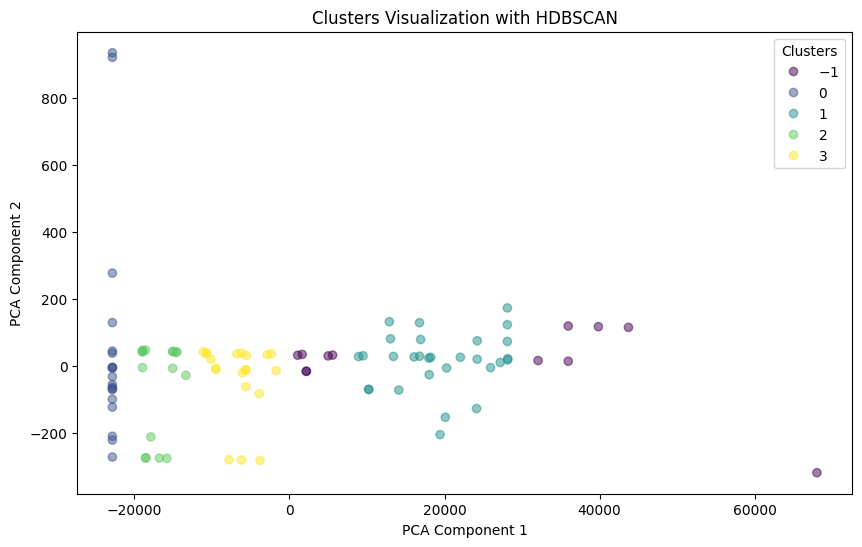

In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import hdbscan

# Assuming new_points is your DataFrame with features and a price column
# Exclude the price column for clustering
features = new_points.drop(columns=['Price'])

# Perform HDBSCAN clustering
clusterer = hdbscan.HDBSCAN(min_cluster_size=10, min_samples=1)
new_points['cluster'] = clusterer.fit_predict(features)

# Sample points from each cluster
sampled_points_list = []

# Define the number of points to sample from each cluster
points_per_cluster = 10

for cluster in new_points['cluster'].unique():
    cluster_points = new_points[new_points['cluster'] == cluster]
    # Sample a fixed number of points from each cluster or all points if fewer than desired
    sample_size = min(points_per_cluster, len(cluster_points))
    sampled_points_list.append(cluster_points.sample(n=sample_size, random_state=42))

# Concatenate the sampled points into a single DataFrame
sampled_points = pd.concat(sampled_points_list, ignore_index=True)

# Drop the cluster column
sampled_points = sampled_points.drop(columns=['cluster'])
print(sampled_points.head())
# Save the sampled points to a new DataFrame
sampled_points.to_csv('sampled_points_cars.csv', index=False)

# Visualize the clusters
# If you have more than two features, use PCA to reduce to two dimensions
pca = PCA(n_components=2)
features_2d = pca.fit_transform(features)

# Create a scatter plot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(features_2d[:, 0], features_2d[:, 1], c=new_points['cluster'], cmap='viridis', alpha=0.5)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters Visualization with HDBSCAN')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()

In [200]:
# sampled_points = preprocess(sampled_points)
display(sampled_points.head())

,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Age_of_Car,Price
0,125530,0,0,3,38,1019,62,4,6,4.8875
1,124995,0,0,4,39,969,62,4,7,4.8875
2,59169,0,0,4,36,700,101,4,10,4.8875
3,124994,0,0,4,38,969,62,4,7,4.8875
4,91232,0,0,2,39,1121,94,4,9,4.8875


In [201]:

sampled_points_std = custom_transform(sampled_points, fit=False)

# Split the data into features and target
X_sampled_points = sampled_points_std.drop('Price', axis=1)  # Features
y_sampled_points = sampled_points_std['Price']  # Target variable (Price)

# Split the dataset into training and testing sets
X_train_sampled_points, X_test_sampled_points, y_train_sampled_points, y_test_sampled_points = train_test_split(
    X_sampled_points, y_sampled_points, test_size=0.3, random_state=0)

In [202]:
# Combine the training datasets
X_train_combined = pd.concat([X_train_cars, X_train_sampled_points], ignore_index=True)
y_train_combined = pd.concat([y_train_cars, y_train_sampled_points], ignore_index=True)

# Combine the testing datasets
X_test_combined = pd.concat([X_test_cars, X_test_sampled_points], ignore_index=True)
y_test_combined = pd.concat([y_test_cars, y_test_sampled_points], ignore_index=True)

# Check the result
print(f"Combined Training Set Shape: {X_train_combined.shape}")
print(f"Combined Testing Set Shape: {X_test_combined.shape}")

# Assign weights
weights_train = np.ones(len(X_train_combined))
weights_train[-len(X_train_sampled_points):] = 1000  # Assign higher weight to the sampled points

Combined Training Set Shape: (3618, 9)
Combined Testing Set Shape: (1551, 9)


In [203]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
weighted_reg_model = LinearRegression()

# Train the model with weights
weighted_reg_model.fit(X_train_combined, y_train_combined, sample_weight=weights_train)

# Make predictions on the test set
y_pred_combined = weighted_reg_model.predict(X_test_combined)

# Calculate performance metrics
rmse_combined = mean_squared_error(y_test_combined, y_pred_combined, squared=False)
r2_combined = r2_score(y_test_combined, y_pred_combined)

# Print out the RMSE and R-squared values
print(f"Weighted Model - RMSE: {rmse_combined}")
print(f"Weighted Model - R² Score: {r2_combined}")

Weighted Model - RMSE: 0.5277494581114985
Weighted Model - R² Score: 0.7244378715388377


/opt/anaconda3/envs/condaEnv311/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



In [133]:
# Define the features and coefficients
features = [
    "Kilometers_Driven", "Fuel_Type", "Transmission", "Owner_Type",
    "Mileage", "Engine", "Power", "Seats", "Age_of_Car", "Age_Mileage"
]
coefficients = weighted_reg_model.coef_

# Combine features and coefficients into a dictionary
feature_coeff_dict = dict(zip(features, coefficients))

# Sort the features by the absolute value of their coefficients
sorted_features = sorted(feature_coeff_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Print the sorted feature-importance pairs
print("Feature Coefficients:")
for feature, coef in sorted_features:
    print(f"{feature}: {coef:.4f}")


Feature Coefficients:
Transmission: 0.4843
Power: 0.4185
Age_of_Car: -0.3864
Fuel_Type: 0.3503
Engine: 0.1505
Owner_Type: 0.0610
Kilometers_Driven: -0.0169
Seats: 0.0088
Mileage: -0.0028


In [134]:
y_pred_weighted_sampled_points = weighted_reg_model.predict(X_test_sampled_points)

# Calculate performance metrics for the sampled points in the test set
rmse_sampled_points = mean_squared_error(y_test_sampled_points, y_pred_weighted_sampled_points, squared=False)
r2_sampled_points = r2_score(y_test_sampled_points, y_pred_weighted_sampled_points)

# Print out the RMSE and R-squared values for the sampled points in the test set
print(f"Performance of Auto-Corrected Model on Sampled Points - RMSE: {rmse_sampled_points}")
print(f"Performance of Auto-Corrected Model on Sampled Points - R² Score: {r2_sampled_points}")

Performance of Auto-Corrected Model on Sampled Points - RMSE: 0.11472655999299783
Performance of Auto-Corrected Model on Sampled Points - R² Score: -4.271372774417906e+30


/opt/anaconda3/envs/condaEnv311/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [135]:
y_pred_normal_sampled_points = linear_reg_model.predict(X_test_sampled_points)

# Calculate performance metrics for the sampled points in the test set
rmse_normal_sampled_points = mean_squared_error(y_test_sampled_points, y_pred_normal_sampled_points, squared=False)
r2_normal_sampled_points = r2_score(y_test_sampled_points, y_pred_normal_sampled_points)

# Print out the RMSE and R-squared values for the sampled points in the test set
print(f"Performance of Normal Model on Sampled Points - RMSE: {rmse_normal_sampled_points}")
print(f"Performance of Normal Model on Sampled Points - R² Score: {r2_normal_sampled_points}")

Performance of Normal Model on Sampled Points - RMSE: 1.0153105019586235
Performance of Normal Model on Sampled Points - R² Score: -3.3453170843249905e+32


/opt/anaconda3/envs/condaEnv311/lib/python3.11/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


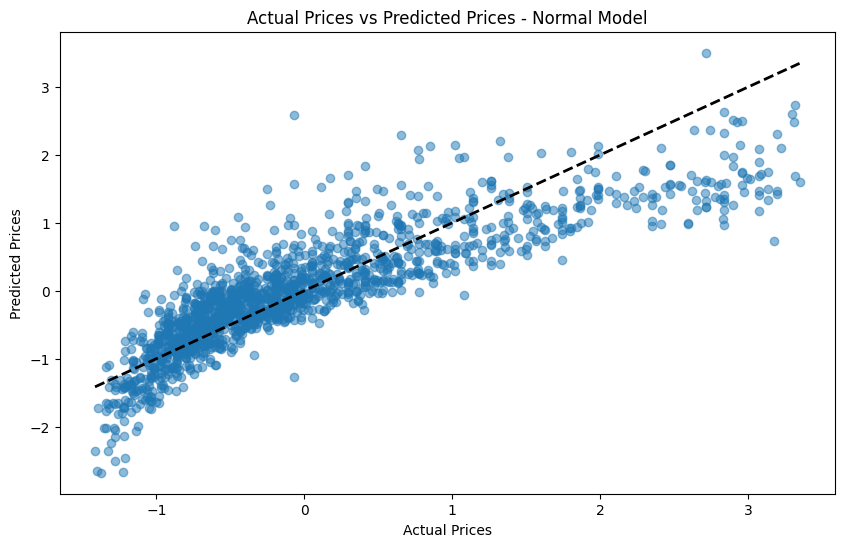

In [136]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_cars, y_pred_cars, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices - Normal Model')
plt.plot([y_test_cars.min(), y_test_cars.max()], [y_test_cars.min(), y_test_cars.max()], 'k--', lw=2)
plt.show()

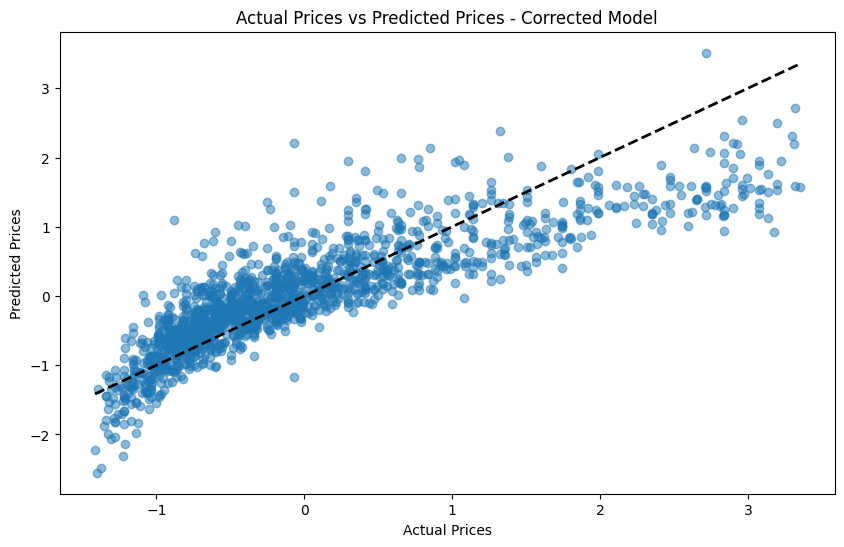

In [137]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(y_test_combined, y_pred_combined, alpha=0.5)
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual Prices vs Predicted Prices - Corrected Model')
plt.plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], 'k--', lw=2)
plt.show()

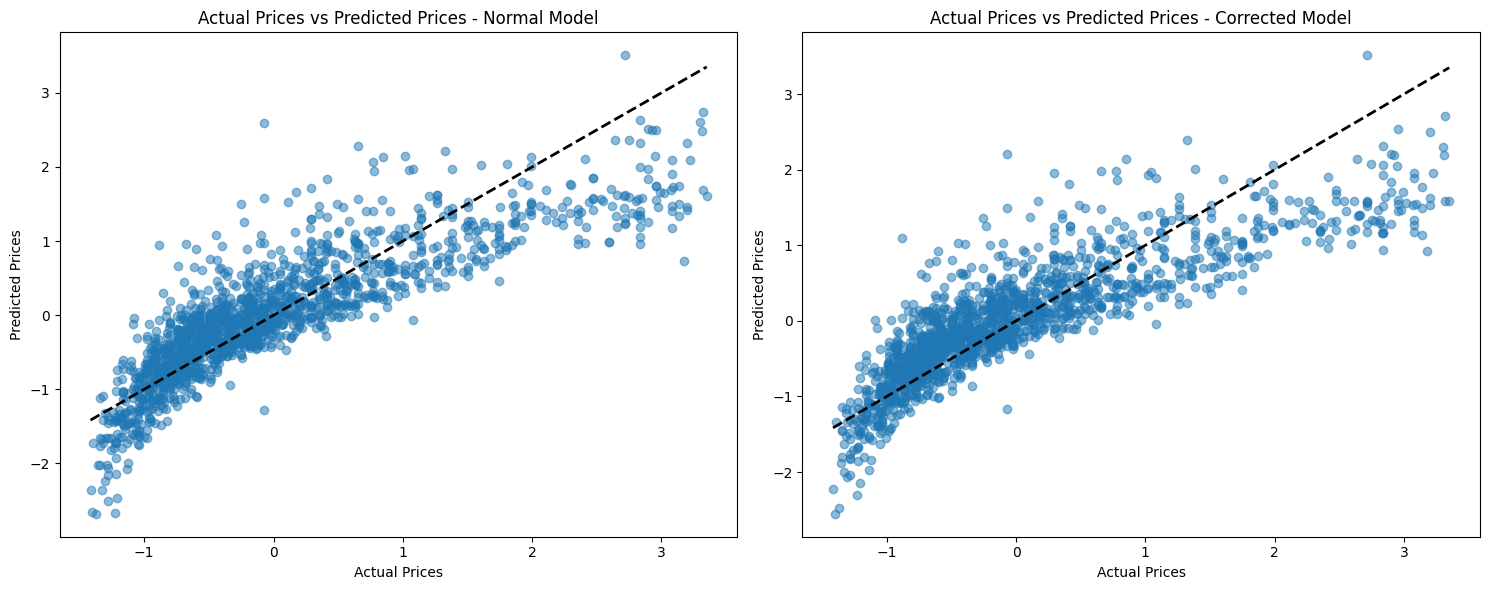

In [138]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# Scatter plot for the normal model
axes[0].scatter(y_test_cars, y_pred_cars, alpha=0.5)
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].set_title('Actual Prices vs Predicted Prices - Normal Model')
axes[0].plot([y_test_cars.min(), y_test_cars.max()], [y_test_cars.min(), y_test_cars.max()], 'k--', lw=2)

# Scatter plot for the corrected model
axes[1].scatter(y_test_combined, y_pred_combined, alpha=0.5)
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].set_title('Actual Prices vs Predicted Prices - Corrected Model')
axes[1].plot([y_test_combined.min(), y_test_combined.max()], [y_test_combined.min(), y_test_combined.max()], 'k--', lw=2)

# Adjust layout
plt.tight_layout()
plt.show()

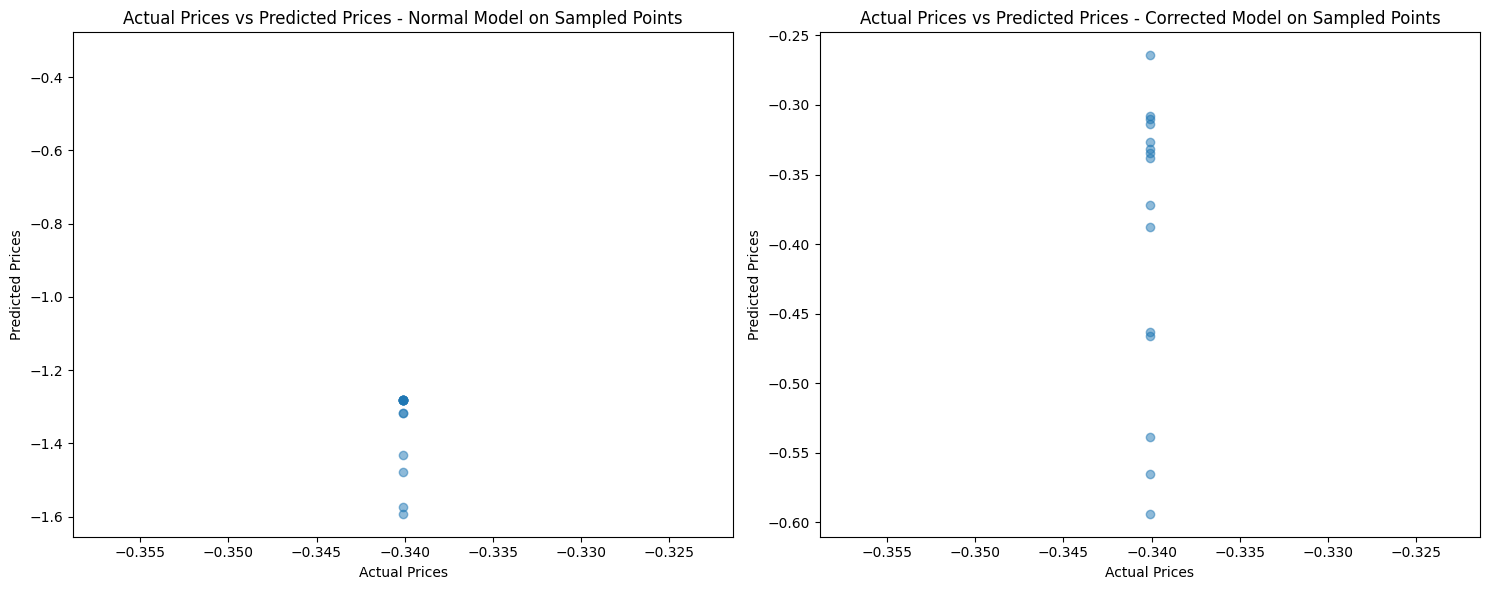

In [139]:
# Create a figure with two subplots for the sampled points
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))

# print(type(y_pred_normal_sampled_points))

# Scatter plot for the normal model on sampled points
axes[0].scatter(y_test_sampled_points, y_pred_normal_sampled_points, alpha=0.5)
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].set_title('Actual Prices vs Predicted Prices - Normal Model on Sampled Points')
axes[0].plot([y_test_sampled_points.min(), y_test_sampled_points.max()], [y_test_sampled_points.min(), y_test_sampled_points.max()], 'k--', lw=2)

# Scatter plot for the corrected model on sampled points
axes[1].scatter(y_test_sampled_points, y_pred_weighted_sampled_points, alpha=0.5)
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].set_title('Actual Prices vs Predicted Prices - Corrected Model on Sampled Points')
axes[1].plot([y_test_sampled_points.min(), y_test_sampled_points.max()], [y_test_sampled_points.min(), y_test_sampled_points.max()], 'k--', lw=2)

# Adjust layout
plt.tight_layout()
plt.show()

In [140]:
import plotly.graph_objects as go

# Create figure
fig = go.Figure()

# Fixed x-positions for the two models
x_normal = 0
x_corrected = 1

# Add scatter plots with enhanced styling
fig.add_trace(
    go.Scatter(
        x=[x_normal]*len(y_pred_normal_sampled_points),
        y=y_pred_normal_sampled_points,
        mode='markers',
        name='Normal Model',
        marker=dict(
            size=10,
            color='royalblue',
            symbol='circle',
            line=dict(color='darkblue', width=1)
        )
    )
)

fig.add_trace(
    go.Scatter(
        x=[x_corrected]*len(y_pred_weighted_sampled_points),
        y=y_pred_weighted_sampled_points,
        mode='markers',
        name='Corrected Model',
        marker=dict(
            size=10,
            color='mediumseagreen',
            symbol='circle',
            line=dict(color='darkgreen', width=1)
        )
    )
)

# Add arrows between corresponding points with gradient color
for i in range(len(y_pred_normal_sampled_points)):
    fig.add_shape(
        type="path",
        path=f"M {x_normal},{y_pred_normal_sampled_points[i]} L {x_corrected},{y_pred_weighted_sampled_points[i]}",
        line=dict(
            color="rgba(255,0,0,0.3)",
            width=2,
        ),
        layer='below'
    )

# Update layout with better styling and legend at bottom right
fig.update_layout(
    title=dict(
        text='Prediction Shifts For Corrective Points: Normal → Corrected Model',
        x=0.5,
        font=dict(size=20)
    ),
    xaxis=dict(
        ticktext=['Normal Model', 'Corrected Model'],
        tickvals=[x_normal, x_corrected],
        title='Model Type',
        range=[-0.2, 1.2],
        showgrid=False
    ),
    yaxis=dict(
        title='Predicted Prices',
        showgrid=True,
        gridwidth=1,
        gridcolor='lightgray'
    ),
    height=700,
    width=900,
    showlegend=True,
    plot_bgcolor='white',
    paper_bgcolor='white',
    legend=dict(
        yanchor="bottom",
        y=0.01,
        xanchor="right",
        x=0.99
    )
)

fig.show()

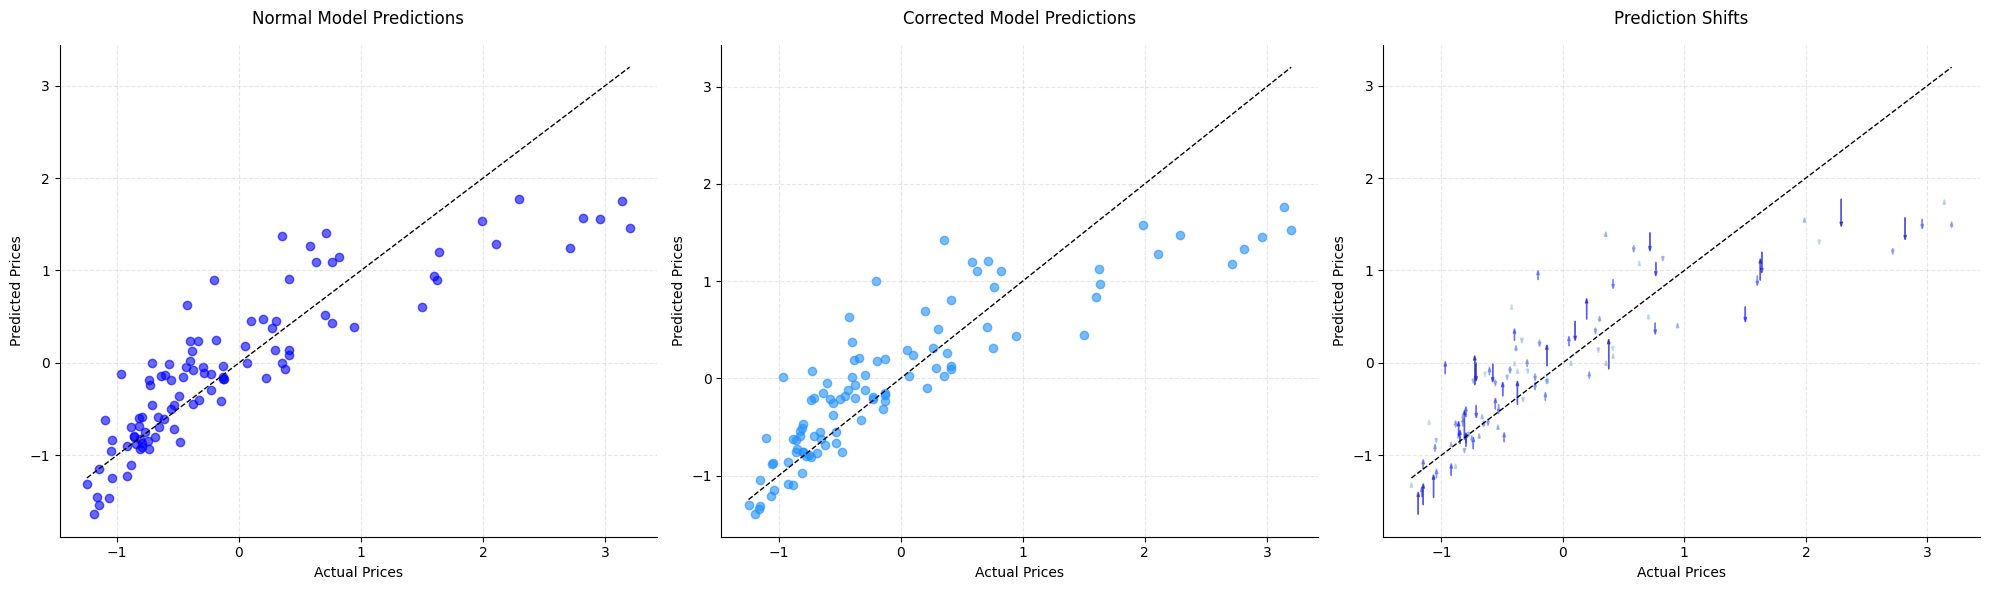

In [141]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from matplotlib.collections import LineCollection
from matplotlib.colors import LinearSegmentedColormap

# Sample 100 random indices from test dataset
sample_indices = np.random.choice(len(y_test_combined), size=100, replace=False)

# Get corresponding actual values and predictions
y_test_sample = y_test_combined.iloc[sample_indices]
X_test_sample = X_test_combined.iloc[sample_indices]

# Get predictions from both models
y_pred_normal = pd.Series(linear_reg_model.predict(X_test_sample))
y_pred_corrected = pd.Series(weighted_reg_model.predict(X_test_sample))

# Create figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# Color scheme
colors = ['#4B0082', '#0000FF', '#1E90FF']  # Dark to light blue

# Scatter plot for normal model
axes[0].scatter(y_test_sample, y_pred_normal, alpha=0.6, c=colors[1])
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].set_title('Normal Model Predictions', pad=15)
axes[0].plot([y_test_sample.min(), y_test_sample.max()], 
             [y_test_sample.min(), y_test_sample.max()], 'k--', lw=1)

# Scatter plot for corrected model
axes[1].scatter(y_test_sample, y_pred_corrected, alpha=0.6, c=colors[2])
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].set_title('Corrected Model Predictions', pad=15)
axes[1].plot([y_test_sample.min(), y_test_sample.max()],
             [y_test_sample.min(), y_test_sample.max()], 'k--', lw=1)

# Arrow plot showing shifts
axes[2].set_xlabel('Actual Prices')
axes[2].set_ylabel('Predicted Prices')
axes[2].set_title('Prediction Shifts', pad=15)
axes[2].plot([y_test_sample.min(), y_test_sample.max()],
             [y_test_sample.min(), y_test_sample.max()], 'k--', lw=1)

# Calculate shift magnitudes for coloring
shifts = abs(y_pred_corrected - y_pred_normal)
norm = plt.Normalize(shifts.min(), shifts.max())
cmap = LinearSegmentedColormap.from_list("", ["lightblue", "blue", "darkblue"])

# Add arrows with gradient colors
for i in range(len(y_test_sample)):
    color = cmap(norm(shifts.iloc[i]))
    axes[2].arrow(y_test_sample.iloc[i], y_pred_normal.iloc[i],
                 0, y_pred_corrected.iloc[i] - y_pred_normal.iloc[i],
                 head_width=0.02, head_length=0.05, 
                 fc=color, ec=color, alpha=0.6,
                 length_includes_head=True)

# Style improvements
for ax in axes:
    ax.grid(True, linestyle='--', alpha=0.3)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()